In [1]:
import random, datetime
from pathlib import Path

from ultralytics import YOLO
from ultralytics.yolo.engine.results import Results
from ultralytics.yolo.utils import set_settings, DATASETS_DIR

import utils

### 学習に利用するデータセットを確認

(600, 800)
(323, 474)
(600, 554)
(570, 600)
(1500, 1460)


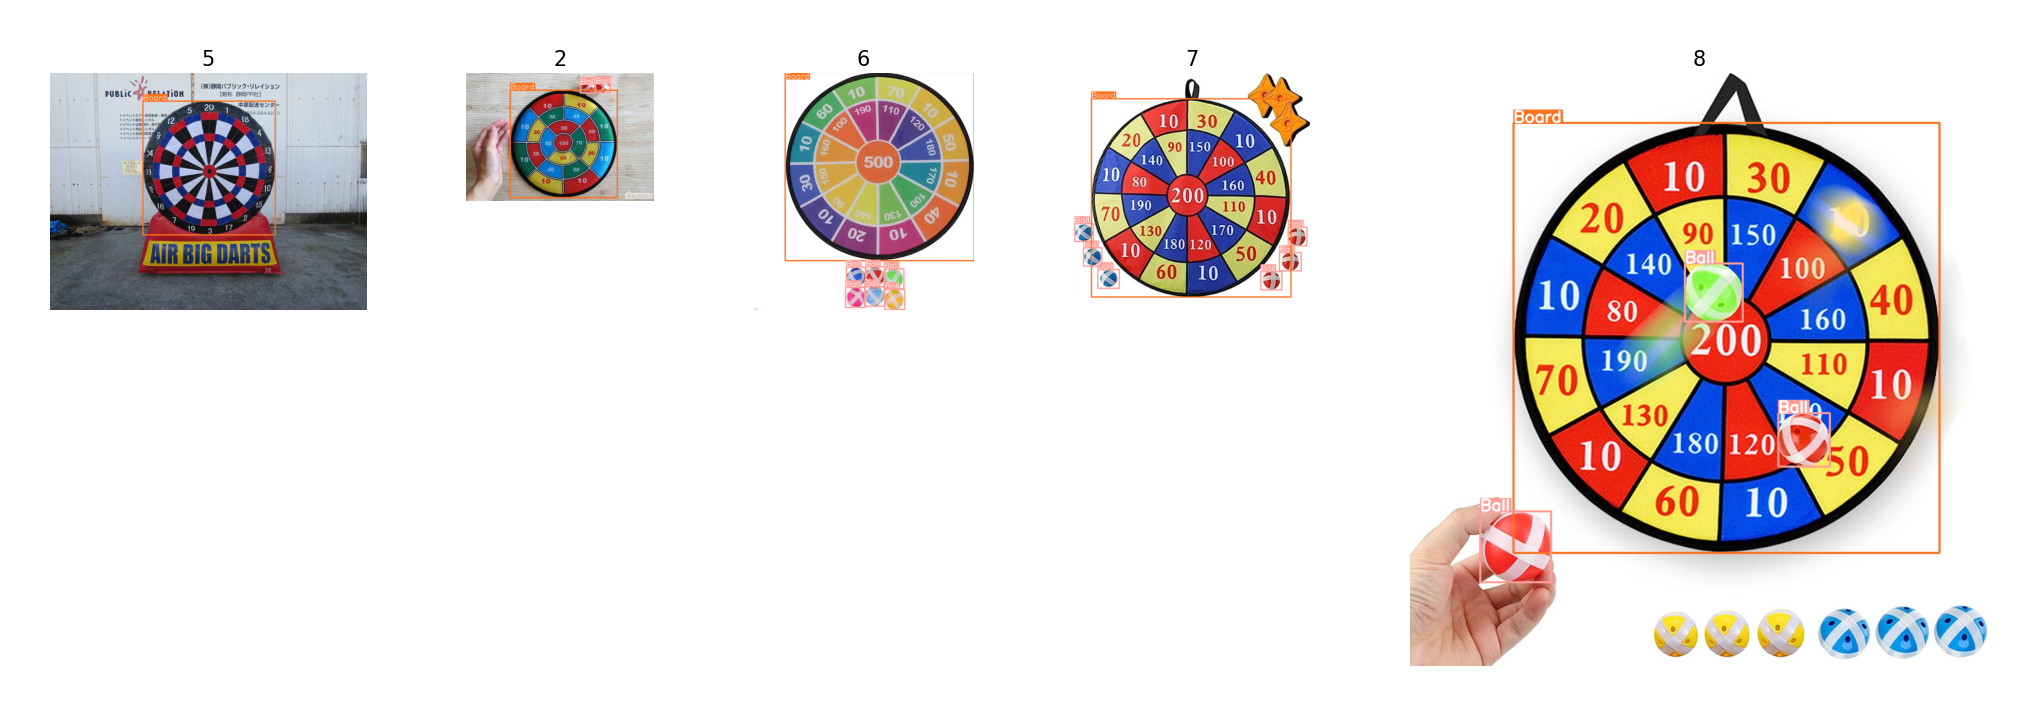

In [2]:
config_path = Path("./data_yolo/sentan-B/config.yaml")

if config_path.suffix != ".yaml":
    raise "not yaml"

yolo_data_train = utils.YOLO_dataset(str(config_path), "train")

imgs = {}
for i in random.sample(range(len(yolo_data_train)), 5):
    yolo_data = yolo_data_train[i]

    res = Results(
        orig_img  = yolo_data["orig_img"],
        path      = yolo_data["img_path"],
        names     = yolo_data_train.class_name,
        boxes     = yolo_data["bboxes"],
        masks     = yolo_data["masks"],
        keypoints = yolo_data["keypoints"],
    )

    imgs[i] = res.plot()[:, :, ::-1]

utils.show_imgs(imgs, ncol=5, dpi=500)

### YOLOライブラリにデータセットの場所を登録

In [3]:
set_settings({"datasets_dir": str(config_path.parent.parent.resolve())})

print(DATASETS_DIR)

C:\Users\hirahara\Documents\Python Scripts\sentan2023\20230727_Dartboard_Detection\data_yolo


### 学習

In [4]:
dt_now = datetime.datetime.now().strftime('%Y%m%d-%H%M')

yolo_model_path = Path("./models/yolov8n.pt")
model = YOLO(str(yolo_model_path))

seed = -1
if seed < 0:
    seed = random.randint(1, 10000000)

print(Path(DATASETS_DIR).exists())

model.train(
                data    = str(config_path), 
                epochs  = 200,
                patience = 0,
                name    = f"{dt_now}_{yolo_model_path.stem}_{config_path.parent.name}",
                project = "./models/",
                seed    = seed
            )


New https://pypi.org/project/ultralytics/8.0.138 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.128  Python-3.9.12 torch-2.0.1+cpu CPU


True


yolo\engine\trainer: task=detect, mode=train, model=models\yolov8n.pt, data=data_yolo\sentan-B\config.yaml, epochs=200, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=./models/, name=20230720-1226_yolov8n_sentan-B, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=6500420, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, wor

KeyboardInterrupt: 

In [ ]:
# model.export(format='onnx')

Ultralytics YOLOv8.0.125 🚀 Python-3.9.12 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients

PyTorch: starting from output/yolov8/20230713-1353_yolov8n_sentan-B_ball_detection_yolo3/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)

ONNX: starting export with onnx 1.14.0 opset 17...
ONNX: export success ✅ 0.4s, saved as output/yolov8/20230713-1353_yolov8n_sentan-B_ball_detection_yolo3/weights/best.onnx (11.7 MB)

Export complete (0.5s)
Results saved to /home/dnn20/hirahara/2023_sentan_B/20230713_yolov8_train/output/yolov8/20230713-1353_yolov8n_sentan-B_ball_detection_yolo3/weights
Predict:         yolo predict task=detect model=output/yolov8/20230713-1353_yolov8n_sentan-B_ball_detection_yolo3/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=output/yolov8/20230713-1353_yolov8n_sentan-B_ball_detection_yolo3/weights/best.onnx imgsz=640 data=dataset/sentan-B_ball_detection_yolo/conf

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



'output/yolov8/20230713-1353_yolov8n_sentan-B_ball_detection_yolo3/weights/best.onnx'